In [18]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [70]:
# Load the training data and the test inputs
X_train = pd.read_csv('X_train.csv') # inputs of the training set
y_train = pd.read_csv('y_train.csv')['class'] # outputs of the training set
X_test = pd.read_csv('X_test.csv') # inputs of the test set

In [71]:
# X_train is a 100,000 * 63 dataframe. 
# Entries (i,j) correspond to the j'th dimension of the observation i
X_train

,ra,dec,rowv,colv,sky_u,sky_g,sky_r,sky_i,sky_z,psfMag_u,...,psffwhm_z,redshift,waveMin,waveMax,wCoverage,spectroFlux_u,spectroFlux_g,spectroFlux_r,spectroFlux_i,spectroFlux_z
0,193.501580,-3.151499,0.001558,-0.003090,1.485249,1.918151,4.959499,10.499020,32.93853,20.96666,...,1.294442,0.084459,3797.519,9200.258,0.3679,6.787869,16.94696,36.79082,55.93771,71.01184
1,193.285642,49.189768,-0.000454,0.002103,0.995259,1.377672,3.382322,7.532795,24.20448,18.92092,...,1.124869,-0.000174,3801.894,9183.326,0.3692,39.508860,70.64217,116.61060,145.60520,160.23250
2,150.991449,6.370981,-0.002789,-0.003372,1.061719,1.655002,3.331498,5.424337,14.75673,20.80383,...,1.171532,0.118706,3823.843,9183.326,0.3775,13.236710,43.51529,114.39910,170.16740,227.93710
3,187.682335,-2.672471,-0.000691,-0.003080,1.267892,1.849097,5.440842,10.755410,34.14946,20.63566,...,1.431124,0.091831,3805.397,9206.615,0.3792,8.067329,28.89629,69.58190,102.09230,135.12630
4,148.597128,57.509841,-0.000070,0.004862,1.312444,1.804335,4.948974,8.895027,30.10676,20.32404,...,1.086376,0.079584,3806.274,9206.615,0.3662,13.455560,37.11879,72.44161,101.22820,116.49640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,233.601881,52.013836,-0.000308,-0.002400,1.077589,1.244746,2.902925,6.120173,20.61655,18.35062,...,1.060425,0.000215,3812.414,9189.672,0.3617,67.099990,103.45680,145.90060,166.28690,173.58290
99996,194.105524,5.938885,0.001045,-0.000376,1.255270,1.945134,4.648764,8.996388,26.29952,20.91685,...,1.300212,0.092195,3800.144,9198.140,0.3774,8.970449,24.55474,54.74533,81.21081,103.49680
99997,208.206848,5.070855,0.002347,-0.002214,1.276237,2.009829,4.647224,8.984879,26.44947,20.05098,...,1.131413,0.077638,3806.274,9202.377,0.3769,23.322030,76.07925,181.18890,266.93620,351.52620
99998,112.678008,24.293026,0.003863,-0.004093,1.796228,2.122674,5.099147,8.386188,21.79727,21.36267,...,1.131865,0.029619,3601.637,10337.130,0.4376,5.306727,23.37940,64.26520,105.96390,155.92960


In [72]:
#y_train contains the true class: GALAXY, STAR or QSO
y_train

0        GALAXY
1          STAR
2        GALAXY
3        GALAXY
4        GALAXY
          ...  
99995      STAR
99996    GALAXY
99997    GALAXY
99998    GALAXY
99999    GALAXY
Name: class, Length: 100000, dtype: object

In [73]:
# X_test is the array of test inputs, of the same format as X_train. The objective is to predict the class (GALAXY, STAR or QSO) of the output
X_test

,ra,dec,rowv,colv,sky_u,sky_g,sky_r,sky_i,sky_z,psfMag_u,...,psffwhm_z,redshift,waveMin,waveMax,wCoverage,spectroFlux_u,spectroFlux_g,spectroFlux_r,spectroFlux_i,spectroFlux_z
0,241.730647,53.671365,0.000380,-0.004342,1.562828,1.908477,4.251122,7.014304,20.59024,18.96788,...,1.142516,0.213616,3804.521,9212.978,0.3698,38.637510,35.90346,54.73668,76.40676,78.25264
1,58.393527,-5.488215,0.002689,0.000811,1.799635,1.890139,5.297109,11.453210,34.26717,19.47850,...,1.256097,-0.000134,3607.447,10365.730,0.4482,19.078250,53.24089,98.73295,128.45720,148.83110
2,124.705275,38.571158,-0.000775,-0.001854,1.427738,1.837706,3.863651,5.644734,14.74347,18.20273,...,1.220830,0.160311,3805.397,9219.344,0.3709,53.254290,59.47568,84.20416,113.15410,129.28660
3,359.042462,-9.518101,0.000743,-0.001545,2.354434,2.319366,5.841194,12.267200,40.10593,20.34005,...,1.166315,0.077089,3814.170,9215.099,0.3752,15.444770,53.37549,132.25710,197.90160,260.71940
4,141.662850,-1.320658,-0.000070,-0.000558,1.631284,1.941935,4.509734,7.570735,21.73190,19.38681,...,1.194134,0.000615,3601.637,10344.270,0.4407,18.286650,56.65990,94.52639,107.97140,111.43660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,179.561654,-0.567745,-0.000434,0.003098,1.105098,1.784247,4.237888,7.407312,20.94038,19.49853,...,1.079108,0.791998,3805.397,9193.904,0.3693,26.916960,23.83401,22.85962,25.44129,31.28081
99996,358.840382,-9.606574,-0.000642,-0.000371,2.204808,2.371322,6.162930,14.409380,47.89735,20.66641,...,1.046605,0.074804,3821.202,9215.099,0.3738,9.464108,23.38738,42.46759,60.15275,72.81676
99997,197.913547,5.676133,0.007677,0.005208,1.557988,1.804992,3.930815,6.127134,17.05484,20.78340,...,1.386856,0.092693,3601.637,10394.410,0.4517,4.893908,16.25003,48.05988,83.06461,133.79870
99998,309.875671,0.890959,0.000075,0.000675,1.914747,2.302077,5.280080,9.593295,28.17045,19.34439,...,0.995003,0.000315,3814.170,9215.099,0.3772,29.754050,58.22580,91.17929,107.05190,114.50940


### Summary

All the predictor variables are floats. There are no missing values.

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 63 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ra             100000 non-null  float64
 1   dec            100000 non-null  float64
 2   rowv           100000 non-null  float64
 3   colv           100000 non-null  float64
 4   sky_u          100000 non-null  float64
 5   sky_g          100000 non-null  float64
 6   sky_r          100000 non-null  float64
 7   sky_i          100000 non-null  float64
 8   sky_z          100000 non-null  float64
 9   psfMag_u       100000 non-null  float64
 10  psfMag_g       100000 non-null  float64
 11  psfMag_r       100000 non-null  float64
 12  psfMag_i       100000 non-null  float64
 13  psfMag_z       100000 non-null  float64
 14  fiberMag_u     100000 non-null  float64
 15  fiberMag_g     100000 non-null  float64
 16  fiberMag_r     100000 non-null  float64
 17  fiberMag_i     100000 non-null

### Class Distribution

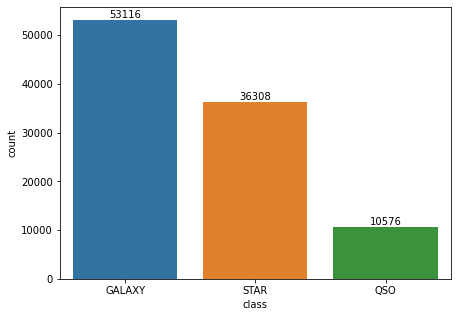

In [75]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(y_train)
ax.bar_label(ax.containers[0]);

### Correlations

In [76]:
corr_matrix = X_train.corr()

<AxesSubplot:>

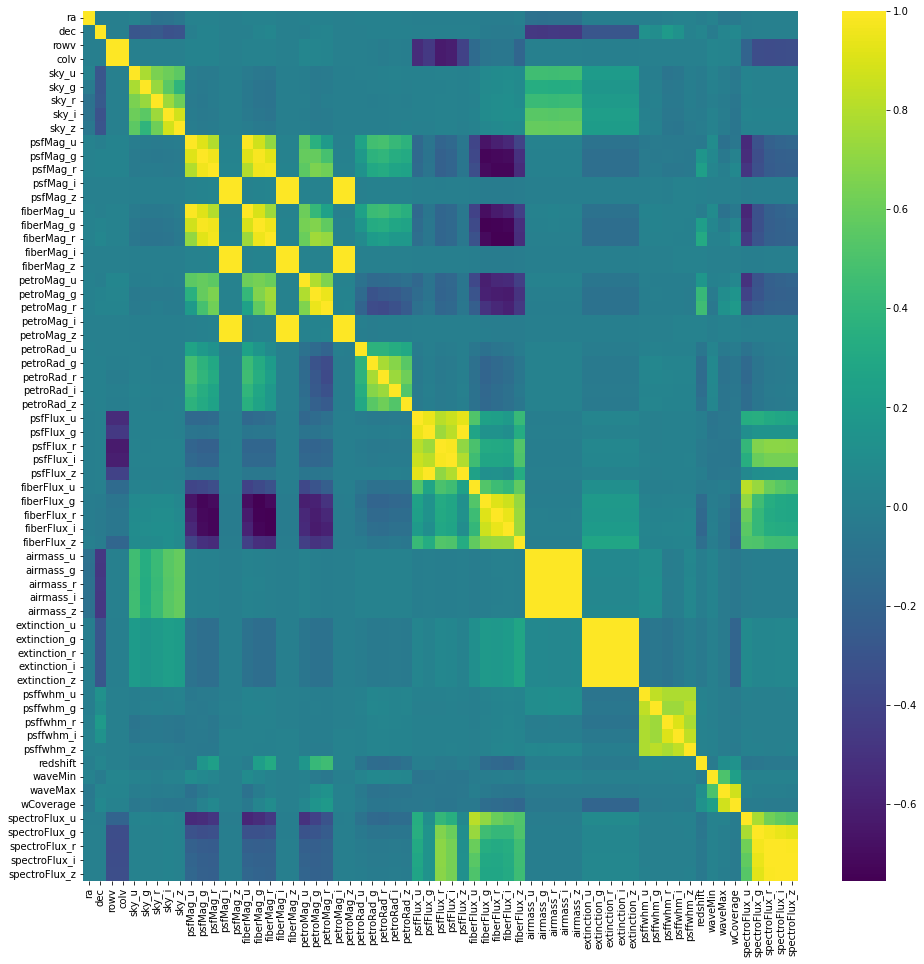

In [77]:
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, cmap='viridis')

### Feature Distribution

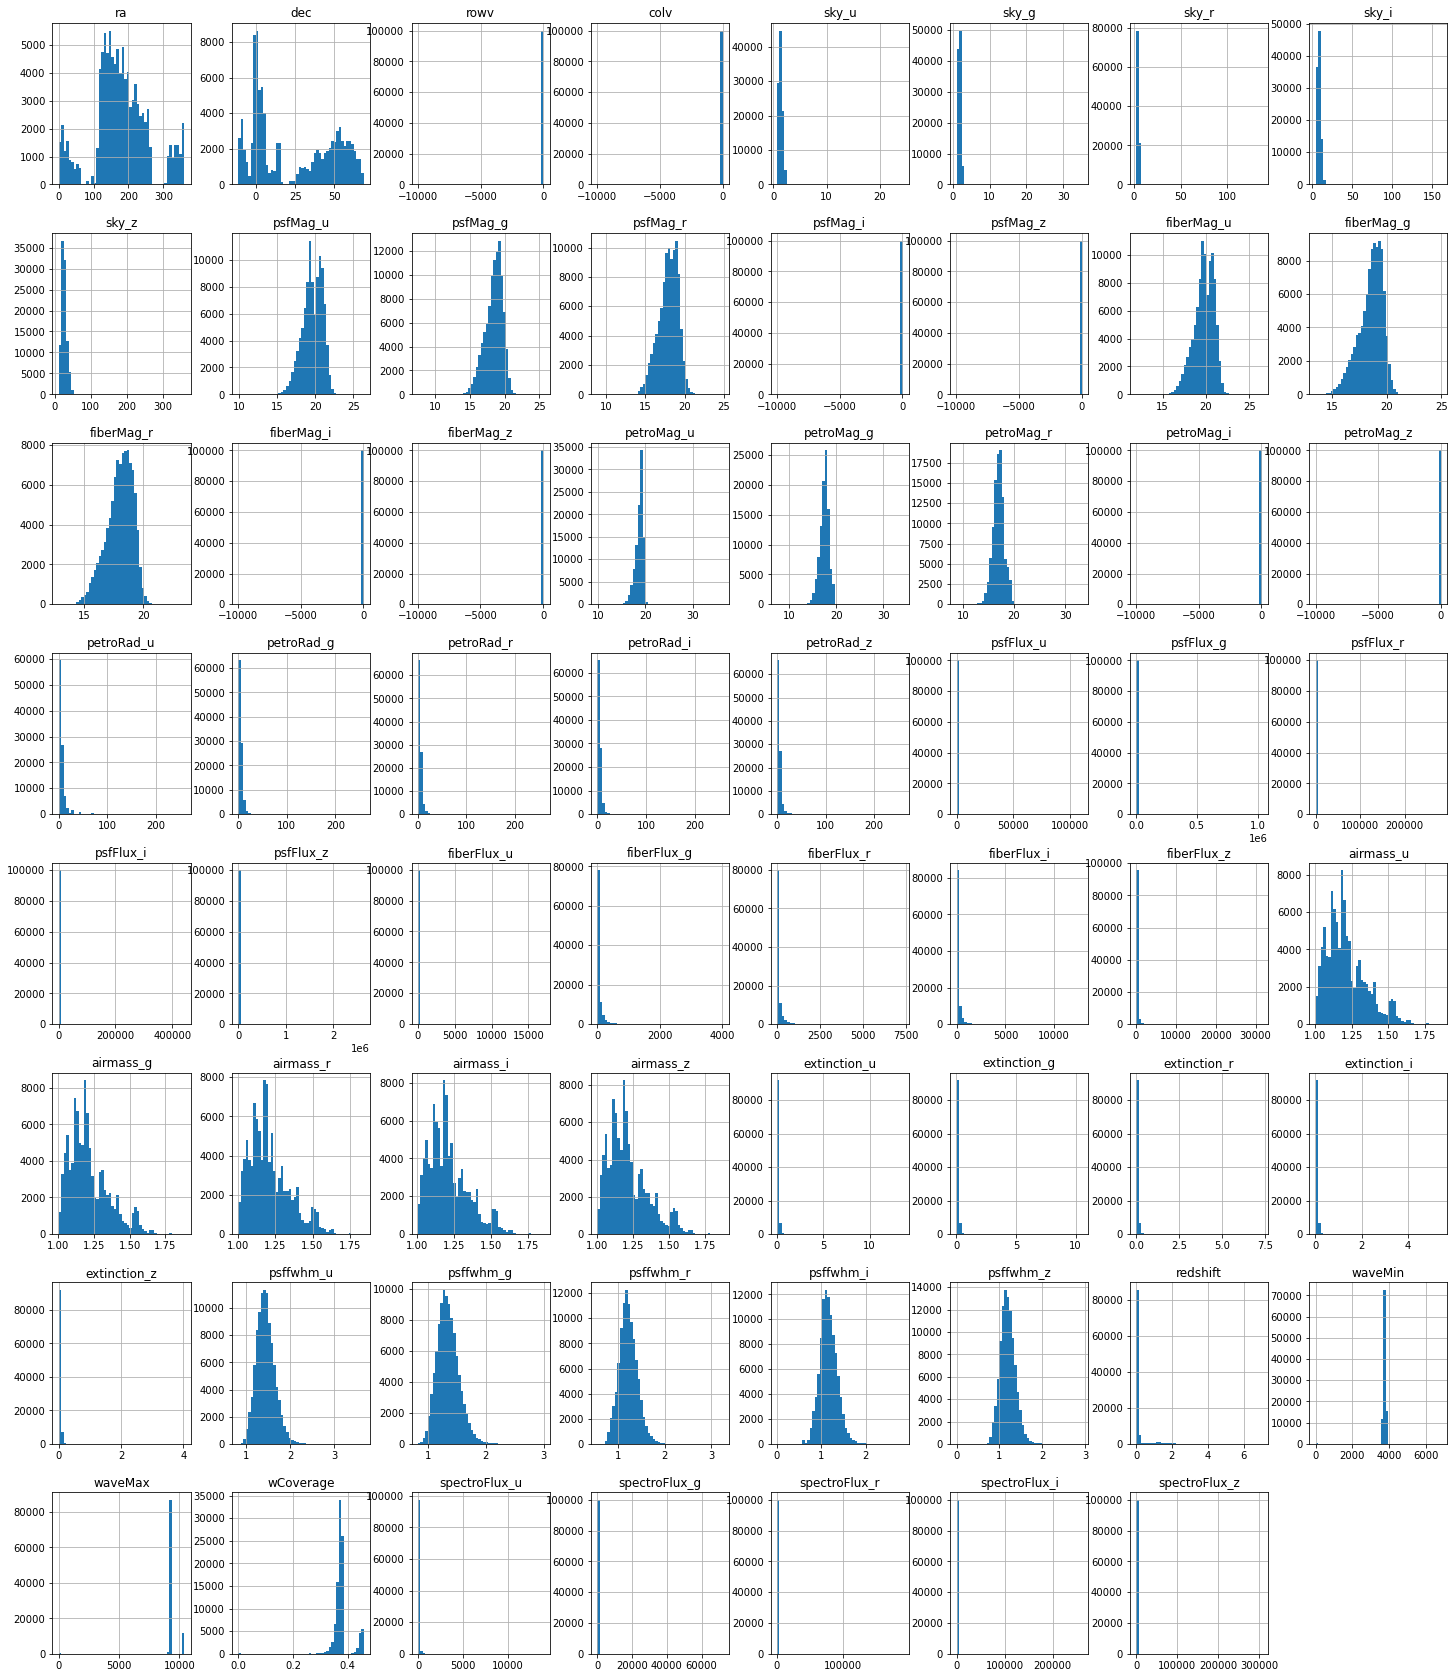

In [7]:
X_train.hist(figsize=(25, 30), bins=50);

Many of the variables are highly skewed. But let's take a closer look.

In [8]:
X_train['rowv'].sort_values()[:10] #colv has the same outliers

69391   -9999.000000
17964   -9999.000000
9388    -9999.000000
83687   -9999.000000
34186   -9999.000000
56975   -9999.000000
63781   -9999.000000
87194      -1.311074
82216      -0.974533
64563      -0.918284
Name: rowv, dtype: float64

In [9]:
X_train['psfMag_i'].sort_values()[:10]

17672   -9999.000000
9388        8.385225
17964       9.065936
95364       9.501758
83687       9.704196
85033       9.713858
48407       9.921138
56975      10.050400
69391      10.063080
92322      10.344550
Name: psfMag_i, dtype: float64

Some columns contain -9999 which probably indicates missing data. Outliers like these should be removed.

### Train/Test Split

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

## K-Nearest Neighbors

In [32]:
%%time

knn_model = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 11, 1)}

grid_knn = GridSearchCV(knn_model, param_grid, scoring='accuracy', verbose=0)
grid_knn.fit(X_train, y_train)

print("The best parameters are: ", grid_knn.best_params_)

knn_model_final = grid_knn.best_estimator_

The best parameters are:  {'n_neighbors': 3}
Wall time: 2min 20s


In [33]:
pred_knn = knn_model_final.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)
print(f'Accuracy on validation set: {acc_knn}')

Accuracy on validation set: 0.9681


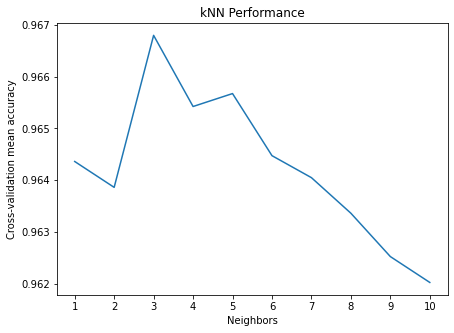

In [34]:
plt.figure(figsize=(7, 5))
plt.plot(np.arange(1, 11, 1), grid_knn.cv_results_['mean_test_score'])
plt.title('kNN Performance')
plt.xlabel('Neighbors')
plt.xticks(np.arange(1, 11, 1))
plt.ylabel('Cross-validation mean accuracy');

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     10642
         QSO       0.92      0.83      0.88      2090
        STAR       0.97      0.98      0.97      7268

    accuracy                           0.97     20000
   macro avg       0.96      0.93      0.94     20000
weighted avg       0.97      0.97      0.97     20000



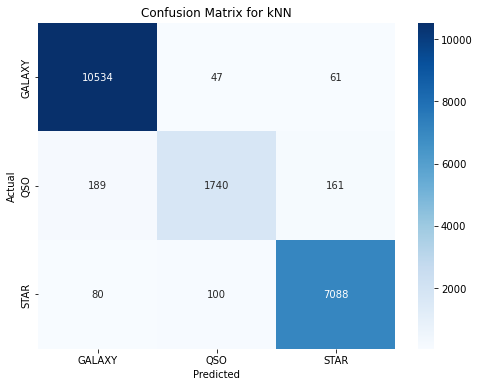

In [35]:
print(classification_report(y_valid, pred_knn))

cm = confusion_matrix(y_valid, pred_knn, labels=["GALAXY", "QSO", "STAR"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['GALAXY', 'QSO', 'STAR'], 
            yticklabels = ['GALAXY', 'QSO', 'STAR'], cmap=plt.cm.Blues)

plt.title('Confusion Matrix for kNN')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

## Random Forests

In [36]:
%%time

rf_model = RandomForestClassifier()

param_grid = {'n_estimators': np.arange(2, 20, 2), 'max_depth': np.arange(5, 25, 5)}

grid_rf = GridSearchCV(rf_model, param_grid, scoring='accuracy', verbose=0)
grid_rf.fit(X_train, y_train)

print("The best parameters are: ", grid_rf.best_params_)

rf_model_final = grid_rf.best_estimator_

The best parameters are:  {'max_depth': 20, 'n_estimators': 14}
Wall time: 11min 8s


In [37]:
pred_rf = rf_model_final.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)
print(f'Accuracy on validation set: {acc_rf}')

Accuracy on validation set: 0.99315


              precision    recall  f1-score   support

      GALAXY       0.99      1.00      0.99     10642
         QSO       0.99      0.95      0.97      2090
        STAR       1.00      1.00      1.00      7268

    accuracy                           0.99     20000
   macro avg       0.99      0.98      0.99     20000
weighted avg       0.99      0.99      0.99     20000



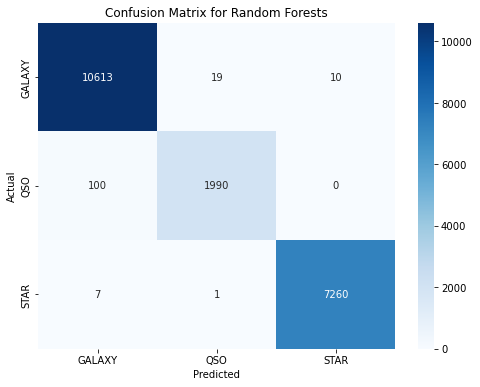

In [41]:
print(classification_report(y_valid, pred_rf))

cm = confusion_matrix(y_valid, pred_rf, labels=["GALAXY", "QSO", "STAR"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['GALAXY', 'QSO', 'STAR'], 
            yticklabels = ['GALAXY', 'QSO', 'STAR'], cmap=plt.cm.Blues)

plt.title('Confusion Matrix for Random Forests')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

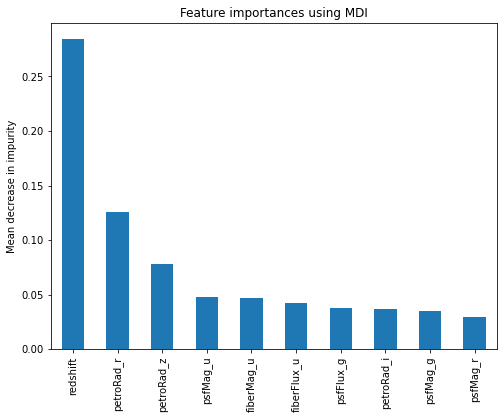

In [58]:
importances = rf_model_final.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
forest_importances[:10].plot.bar()
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.show();

## Naive Bayes

Garbage

In [60]:
%%time

nb_model = GaussianNB()

param_grid = {}

grid_nb = GridSearchCV(nb_model, param_grid, scoring='accuracy')
grid_nb.fit(X_train, y_train)

# print("The best parameters are: ", grid_nb.best_params_)

nb_model_final = grid_nb.best_estimator_



Wall time: 1.18 s


In [61]:
pred_nb = nb_model_final.predict(X_valid)
acc_nb = accuracy_score(y_valid, pred_nb)
acc_nb

0.3721

## SVM

(This took almost 30 minutes to run)

In [63]:
%%time

svc_model = LinearSVC()

param_grid = {'C': np.logspace(-2, 2, 5), 'penalty': ['l1', 'l2']}

grid_svc = GridSearchCV(svc_model, param_grid, scoring='accuracy', verbose=0)
grid_svc.fit(X_train, y_train)

print("The best parameters are: ", grid_svc.best_params_)

svc_model_final = grid_svc.best_estimator_

The best parameters are:  {'C': 0.1, 'penalty': 'l2'}
Wall time: 27min 39s


In [64]:
pred_svc = svc_model_final.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)
print(f'Accuracy on validation set: {acc_svc}')

Accuracy on validation set: 0.9518


              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     10642
         QSO       0.86      0.74      0.80      2090
        STAR       0.94      0.95      0.95      7268

    accuracy                           0.95     20000
   macro avg       0.92      0.90      0.91     20000
weighted avg       0.95      0.95      0.95     20000



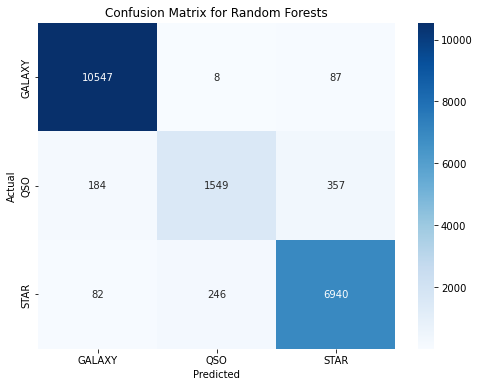

In [68]:
print(classification_report(y_valid, pred_svc))

cm = confusion_matrix(y_valid, pred_svc, labels=["GALAXY", "QSO", "STAR"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['GALAXY', 'QSO', 'STAR'], 
            yticklabels = ['GALAXY', 'QSO', 'STAR'], cmap=plt.cm.Blues)

plt.title('Confusion Matrix for Linear SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

## Export in csv format 

In [65]:
y_pred = rf_model_final.predict(X_test)

In [66]:
prediction = pd.DataFrame(y_pred, columns=['Class'])
prediction.index.name='Index'
prediction.to_csv('myprediction.csv') 